## 필요 라이브러리

In [2]:
import os
import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:/Users/user/Desktop/잡/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)')
# 폰트 설정
mpl.rc('font', family= 'Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터 작업 시작

##### 파일 호출

In [3]:
dong_data=pd.ExcelFile('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx').parse(3)
cate_data=pd.ExcelFile('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx').parse(4)
total_data=pd.ExcelFile('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx').parse(5)

##### 데이터 전처리 작업 진행

In [4]:
dong_data=dong_data.iloc[2:,:]
dong_col=dong_data.loc[2]
for i in range(3,len(dong_col)):
    dong_col[i]=int(dong_col[i])
dong_col=list(map(str,dong_col))
dong_data.columns=dong_col
dong_data=dong_data.iloc[1:,:]
dong_data.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
3,전체,NaN,NaN,1.198007,1.017985,0.963684,0.918759,1.028130,0.900022,1.062491,...,1.080985,1.020417,0.885803,1.021254,1.067526,1.063149,1.076086,1.137684,1.045754,0.928725
4,서울특별시,NaN,NaN,1.188696,1.004386,0.953775,0.899579,1.036262,0.892765,1.079589,...,1.162798,1.078928,0.930147,1.098651,1.143194,1.147769,1.169708,1.226083,1.110484,0.978101
5,서울특별시,중구,NaN,1.379749,1.037523,1.013265,0.898529,1.003199,0.892831,1.264520,...,1.230307,0.998263,0.777919,1.186941,1.259630,1.243106,1.289460,1.295647,1.002761,0.849583
6,서울특별시,중구,소공동,1.668360,1.115390,1.211998,1.033635,1.112612,1.054682,1.834032,...,1.484447,0.819555,0.608719,1.334733,1.475264,1.499739,1.566971,1.491554,0.785321,0.680223
7,서울특별시,중구,회현동,1.216539,1.231600,1.216814,1.264384,1.245211,1.186977,1.185489,...,1.123279,0.813363,0.665930,1.198933,1.253730,1.236836,1.179716,1.232473,0.793768,0.773963


##### 단위 변환

In [5]:
dong_data.iloc[:,3:]=dong_data.iloc[:,3:]*10000

In [6]:
dong_data.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
3,전체,NaN,NaN,11980.06853,10179.85406,9636.83606,9187.58970,10281.30410,9000.21923,10624.91023,...,10809.85083,10204.17442,8858.03366,10212.54399,10675.25727,10631.48710,10760.86452,11376.84360,10457.54034,9287.24704
4,서울특별시,NaN,NaN,11886.95567,10043.85657,9537.75110,8995.79145,10362.62396,8927.64692,10795.88714,...,11627.98483,10789.27787,9301.46991,10986.50825,11431.94240,11477.68887,11697.07972,12260.83266,11104.83783,9781.00873
5,서울특별시,중구,NaN,13797.48654,10375.22692,10132.64966,8985.29439,10031.98797,8928.30568,12645.19592,...,12303.06931,9982.63448,7779.19011,11869.40656,12596.29600,12431.06440,12894.59844,12956.46849,10027.61420,8495.83087
6,서울특별시,중구,소공동,16683.59661,11153.89974,12119.97542,10336.34890,11126.12355,10546.81940,18340.31878,...,14844.47171,8195.55214,6087.18613,13347.33302,14752.64398,14997.39193,15669.71175,14915.54289,7853.20954,6802.22857
7,서울특별시,중구,회현동,12165.38711,12315.99625,12168.14097,12643.83519,12452.11253,11869.77374,11854.89210,...,11232.78972,8133.62809,6659.29784,11989.33446,12537.29860,12368.36279,11797.15823,12324.73301,7937.68285,7739.63172


##### 결측치 삭제

In [8]:
dong_data_1=dong_data.dropna().reset_index(drop=True)
dong_data_1.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,16683.59661,11153.89974,12119.97542,10336.34890,11126.12355,10546.81940,18340.31878,...,14844.47171,8195.55214,6087.18613,13347.33302,14752.64398,14997.39193,15669.71175,14915.54289,7853.20954,6802.22857
1,서울특별시,중구,회현동,12165.38711,12315.99625,12168.14097,12643.83519,12452.11253,11869.77374,11854.89210,...,11232.78972,8133.62809,6659.29784,11989.33446,12537.29860,12368.36279,11797.15823,12324.73301,7937.68285,7739.63172
2,서울특별시,중구,명동,17451.68596,8779.84563,10424.93680,9011.13747,10342.72058,7860.23999,14337.46988,...,12684.74351,7181.69968,4425.44221,12505.29983,13555.35205,13175.34097,13853.98926,13828.66455,7217.11108,5135.24692
3,서울특별시,중구,필동,13186.90718,8466.79115,8046.49812,7134.22530,8034.80231,7327.43827,11977.37947,...,12219.36277,8949.36461,6822.59634,12883.90698,12650.62804,12141.37993,13128.42815,12852.46978,8303.70864,7142.64887
4,서울특별시,중구,장충동,6836.87321,6346.88052,6282.39700,5488.36737,5748.00777,6105.62079,6409.54974,...,7059.40670,7283.71130,6476.68993,7084.35343,6758.64199,7198.12565,7657.96627,7783.98506,7351.63984,6448.60055


##### 구 기준으로 업종별 구분 작업 진행

In [10]:
cate_data.fillna(0,inplace=True)
for i in range(len(dong_data_1)):
    idx=cate_data[cate_data['ADMD']==dong_data_1.iloc[i,2]].index
    cate_data.iloc[idx,5:]=cate_data.iloc[idx,5:]*dong_data_1.iloc[i,3:]

In [11]:
cate_data.groupby(['PVN','BOR','ANTC_ITEM_LCLS_NM']).sum()

ANTC_ITEM_LCLS_CD      20190201      20190202  \
PVN   BOR ANTC_ITEM_LCLS_NM                                                  
대구광역시 수성구 간식                               400  37603.985583  40682.576362   
          마실거리                             600  60573.636955  65983.625288   
          사회활동                            1400   1878.116708   1955.608311   
          식사                               200  69868.777466  66113.722217   
          임신/육아                           1600    875.738855   1041.360460   
          취미&여가활동                         1200    769.306081   1090.114094   
          헬스&뷰티                           1000  10207.552558  12276.413454   
          홈&리빙                             800   6782.552259   4198.977406   
      중구  간식                               140  16217.182792  16417.782372   
          마실거리                             210  30844.141175  30775.399657   
          사회활동                             490    717.658683    960.488906   
          식사                                70  38241.825527  28867.005274   
          임신/육아                            560    236.523320    235.293064   
          취미&여가활동                          420   3187.386247    410.335085   
          헬스&뷰티                            350  17444.417976   6601.836361   
          홈&리빙                             280   2663.421451   2072.616532   
서울특별시 노원구 간식                               360  45511.222064  46334.450900   
          마실거리                             540  61474.158987  64500.986085   
          사회활동                            1260   1486.442594   1539.159980   
          식사                               180  64162.210132  56741.522619   
          임신/육아                           1440    649.967277    634.096219   
          취미&여가활동                         1080   1147.085525   2212.427374   
          헬스&뷰티                            900  10909.943824   8087.735197   
          홈&리빙                             720   5930.561640   4960.253706   
      중구  간식                               300  39080.654441  38461.951086   
          마실거리                             450  61973.059079  53819.980706   
          사회활동                            1050   2149.984499   2045.984832   
          식사                               150  62541.848789  48285.109348   
          임신/육아                           1200    472.225585    657.558155   
          취미&여가활동                          900   2394.078111    942.997150   
          헬스&뷰티                            750  11695.640749   9460.697012   
          홈&리빙                             600   8872.873621   5149.510332   

                                 20190203      20190204      20190205  \
PVN   BOR ANTC_ITEM_LCLS_NM                                             
대구광역시 수성구 간식                 37617.447490  42684.295017  47713.551175   
          마실거리               59314.969369  63130.855294  73691.862647   
          사회활동                1465.277916   2397.036733   2989.482757   
          식사                 59561.596342  59775.537654  53068.116871   
          임신/육아                744.984037   1177.857262   2134.926092   
          취미&여가활동             1141.095539   1437.041932   1907.408871   
          헬스&뷰티              16638.653161  13910.868904  14548.581294   
          홈&리빙                3570.545820   3881.114819   3643.804412   
      중구  간식                 14144.689155  13781.719616  15032.502479   
          마실거리               25923.614605  25983.314962  28719.950173   
          사회활동                 785.312719   1074.856116    668.292642   
          식사                 24846.366422  22525.395663  22548.887845   
          임신/육아                346.667752    213.964170    405.082079   
          취미&여가활동              166.245857    535.354984    655.938058   
          헬스&뷰티              10371.920190   6237.248455   7501.479513   
          홈&리빙                1724.637252   1717.979585   1879.746417   
서울특별시 노원구 간식                 41953.165283  45255.126957  60866

##### 지역 이름을 구 이름 앞에 붙이는 작업 진행

In [12]:
cate_data['BOR']=cate_data['PVN'].apply(lambda x : x[:2])+' '+cate_data['BOR']
cate_data.head()

,PVN,BOR,ADMD,ANTC_ITEM_LCLS_CD,ANTC_ITEM_LCLS_NM,20190201,20190202,20190203,20190204,20190205,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,서울 중구,소공동,10,식사,4798.923400,3390.781918,3340.651465,3674.814793,3536.781044,...,3985.288818,1992.383178,1995.699325,4002.583944,3653.600492,3977.365375,3934.661612,3575.669880,1808.581058,2209.916813
1,서울특별시,서울 중구,소공동,20,간식,3098.613083,2535.177858,2728.592719,2464.854474,2995.226370,...,2898.548870,1878.618580,1104.672894,2322.182853,2612.544734,3003.198084,3064.223070,3359.942774,1673.735859,1303.594994
2,서울특별시,서울 중구,소공동,30,마실거리,6399.111049,3843.341005,3291.686764,3187.728254,3548.749537,...,5858.305430,3290.770246,2156.738463,5496.493803,5583.736673,6434.486448,6605.288741,6417.995034,3378.402423,2550.021977
3,서울특별시,서울 중구,소공동,40,홈&리빙,696.364147,312.550965,210.735042,155.190893,174.043948,...,533.865556,224.238600,164.681790,501.266486,684.118473,385.433348,677.635024,396.807778,333.252745,134.617403
4,서울특별시,서울 중구,소공동,50,헬스&뷰티,1359.431621,939.486082,2273.289322,592.122057,688.510894,...,1289.223397,633.328068,587.792103,866.797349,2066.256112,1021.204301,1182.712800,921.395551,548.311962,478.337148


##### 월별 매출 합계 작업을 위한 전처리 작업

In [15]:
cate_data_1=cate_data.iloc[:,5:]
cate_month=pd.DataFrame()
cate_col=cate_data.columns[5:]
k=cate_col[0]
a=0
col=[]
for i in range(len(cate_col)):
    if k[:6]==cate_col[i][:6]:
        continue
    else:
        cate_month=pd.concat([cate_month,cate_data.iloc[:,a:i].sum(axis=1)],axis=1)
        col.append(k[:6])
        a=i
        k=cate_col[i]
cate_month.columns=col
cate_month=pd.concat([cate_data.BOR,cate_data.ANTC_ITEM_LCLS_NM,cate_month],axis=1)

In [16]:
cate_month

,BOR,ANTC_ITEM_LCLS_NM,201902,201903,201904,201905,202002,202003,202004
0,서울 중구,식사,102834.369618,148883.272030,150773.456836,152570.503557,125898.898415,111251.845103,93740.793779
1,서울 중구,간식,92895.443668,139214.512265,127586.252835,124337.835907,114100.530970,84029.284990,63051.534567
2,서울 중구,마실거리,138464.395913,218476.503955,234462.817874,247554.437543,168630.087685,130058.066950,125400.669581
3,서울 중구,홈&리빙,11746.472887,18121.223645,17662.590776,15470.954738,14794.655097,13869.472615,10916.458833
4,서울 중구,헬스&뷰티,29305.168782,49746.823138,54216.418869,41709.786374,53848.083542,27832.378184,25749.797511
...,...,...,...,...,...,...,...,...,...
475,대구 수성구,홈&리빙,2578.843009,3473.633051,2864.720012,3626.016371,3106.673401,2564.667921,2493.264543
476,대구 수성구,헬스&뷰티,8900.106818,9688.969309,8473.032841,9391.593702,18795.505200,13258.501992,7875.371754
477,대구 수성구,취미&여가활동,977.622068,599.522706,896.125317,2908.260249,678.286640,889.950647,1058.951092
478,대구 수성구,사회활동,2397.054782,2593.465246,1839.417113,2110.615444,1926.479424,1006.457798,1461.705953


In [17]:
cate_month.groupby(['BOR','ANTC_ITEM_LCLS_NM']).sum().T['대구 수성구']

ANTC_ITEM_LCLS_NM,간식,마실거리,사회활동,식사,임신/육아,취미&여가활동,헬스&뷰티,홈&리빙
201902,9.844561e+05,1.403656e+06,45327.787923,1.524847e+06,20787.062781,26663.194844,221276.186010,90682.008671
201903,1.263147e+06,1.879995e+06,50634.083663,1.977893e+06,30675.384528,29345.063110,289771.938590,119725.561716
201904,1.114246e+06,2.038142e+06,49075.700930,1.920305e+06,28699.660513,28870.802892,274577.653263,118285.161758
201905,1.181657e+06,2.343528e+06,50702.768886,1.930346e+06,42205.910884,54891.306290,285084.634208,127364.973666
202002,1.202811e+06,1.688249e+06,38805.575248,1.667833e+06,23778.849121,19783.154743,449141.412545,131443.340365
202003,1.095861e+06,1.438163e+06,30748.111854,1.421728e+06,21204.588025,20195.356962,312650.233621,115479.499420
202004,1.005814e+06,1.617739e+06,29395.834427,1.415667e+06,25394.070882,19833.573181,232398.707347,114429.284243


In [18]:
cate_month.groupby(['ANTC_ITEM_LCLS_NM']).sum().T.sum(axis=1)

201902    1.491566e+07
201903    2.053800e+07
201904    1.999553e+07
201905    2.149190e+07
202002    1.862163e+07
202003    1.616263e+07
202004    1.589438e+07
dtype: float64

##### 월별 전체 매출 합계 시각화

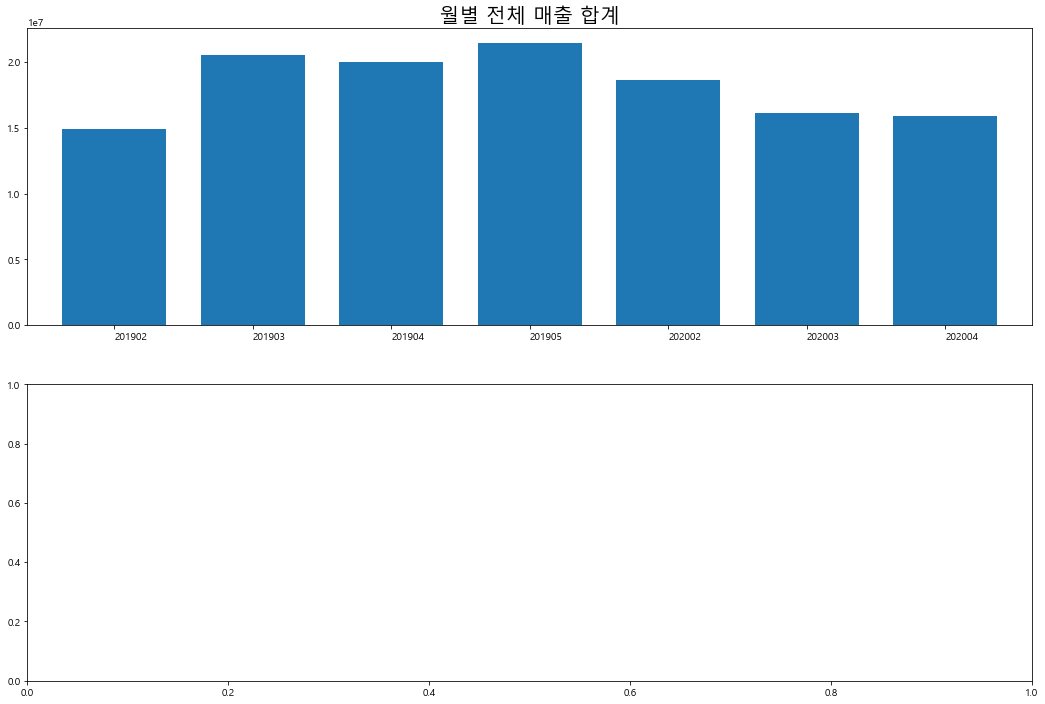

In [19]:
fig,axes=plt.subplots(nrows=2)
fig.set_size_inches(18,12)
cate_month.groupby(['ANTC_ITEM_LCLS_NM']).sum().T.sum(axis=1).plot(kind='bar',width=0.75,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_title('월별 전체 매출 합계',size=20)
plt.show()

##### 전체 카테고리별 매출 합계

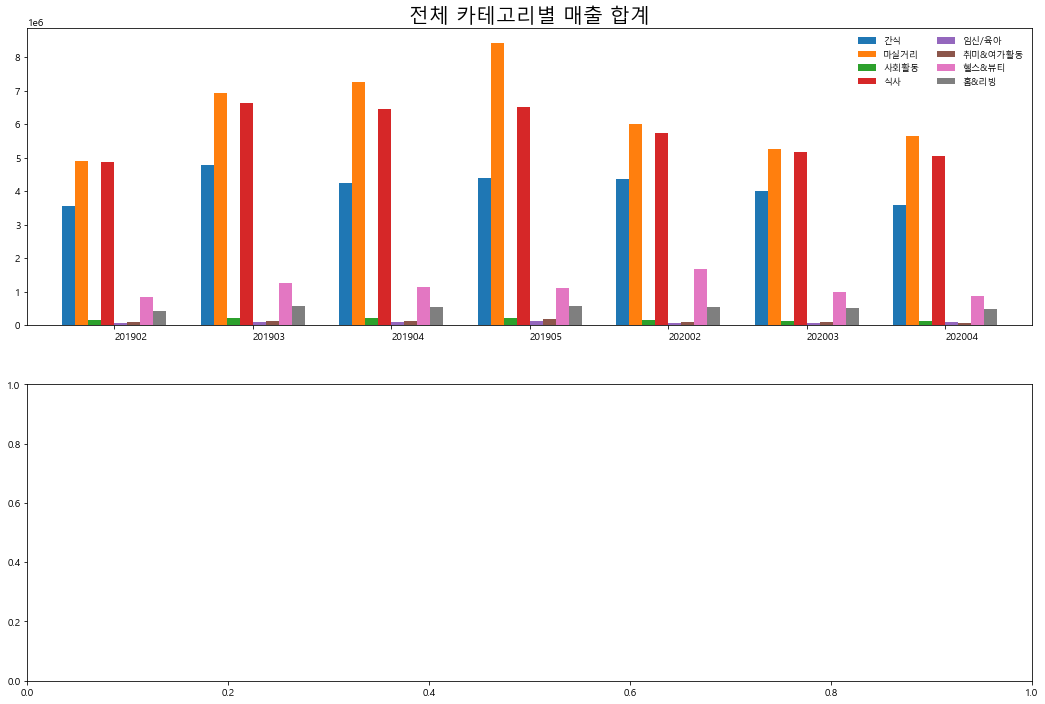

In [20]:
fig,axes=plt.subplots(nrows=2)
fig.set_size_inches(18,12)
cate_month.groupby(['ANTC_ITEM_LCLS_NM']).sum().T.plot(kind='bar',width=0.75,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_title('전체 카테고리별 매출 합계',size=20)
axes[0].legend(loc='upper right', frameon=False,fontsize=9,ncol=2)
plt.show()

##### 지역마다 업종별 매출 합계 그래프 시각화

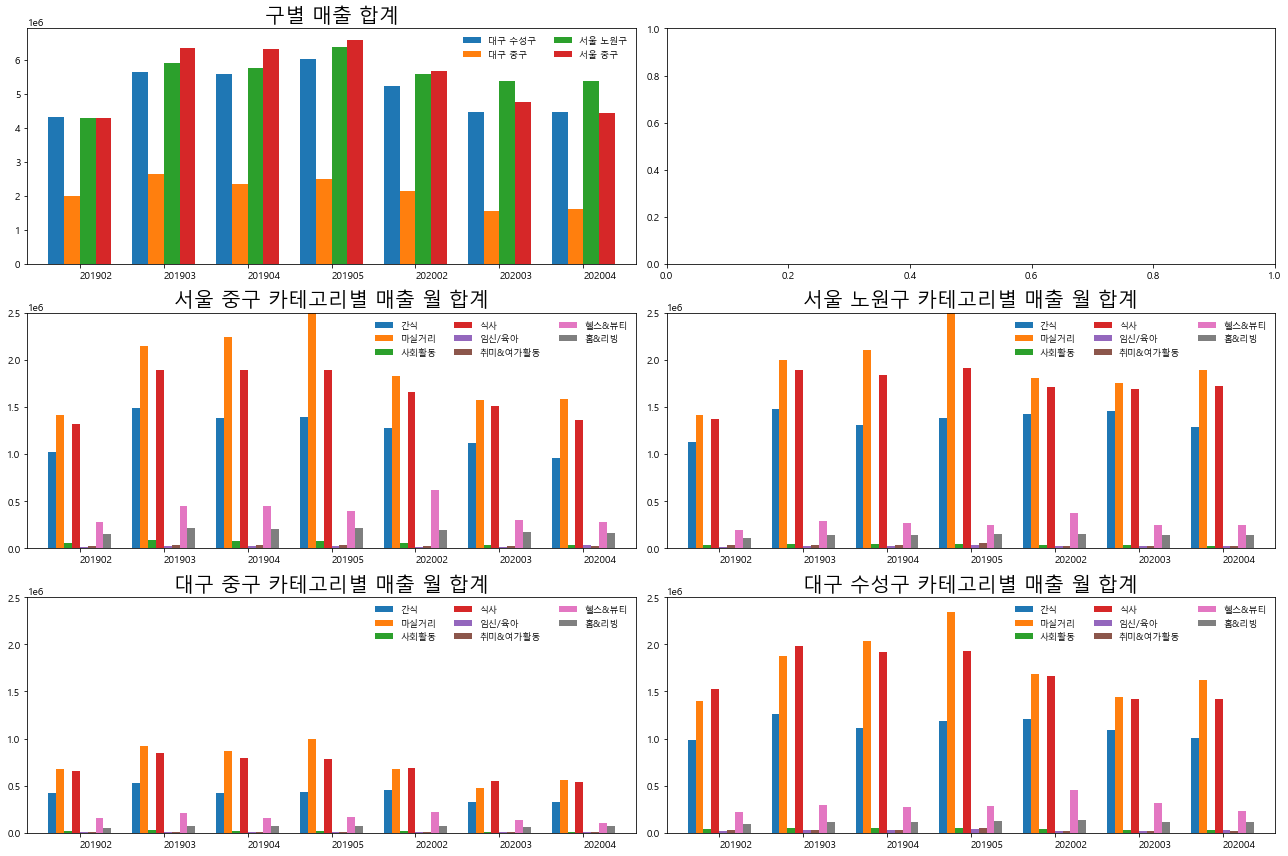

In [21]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(18,12)


cate_month.groupby(['BOR']).sum().T.plot(kind='bar',width=0.75,ax=axes[0][0])
plt.setp(axes[0][0].get_xticklabels(), rotation=0, ha='left')
axes[0][0].set_title('구별 매출 합계',size=20)
axes[0][0].legend(loc='upper right', frameon=False,fontsize=9,ncol=2)

cate_month.groupby(['BOR','ANTC_ITEM_LCLS_NM']).sum().T['서울 중구'].plot(kind='bar',width=0.75,ax=axes[1][0])
plt.setp(axes[1][0].get_xticklabels(), rotation=0, ha='left')
axes[1][0].set_title('서울 중구 카테고리별 매출 월 합계',size=20)
axes[1][0].legend(loc='upper right', frameon=False,fontsize=9,ncol=3)
axes[1][0].set_ylim(0,2500000)

cate_month.groupby(['BOR','ANTC_ITEM_LCLS_NM']).sum().T['서울 노원구'].plot(kind='bar',width=0.75,ax=axes[1][1])
plt.setp(axes[1][1].get_xticklabels(), rotation=0, ha='left')
axes[1][1].set_title('서울 노원구 카테고리별 매출 월 합계',size=20)
axes[1][1].legend(loc='upper right', frameon=False,fontsize=9,ncol=3)
axes[1][1].set_ylim(0,2500000)

cate_month.groupby(['BOR','ANTC_ITEM_LCLS_NM']).sum().T['대구 중구'].plot(kind='bar',width=0.75,ax=axes[2][0])
plt.setp(axes[2][0].get_xticklabels(), rotation=0, ha='left')
axes[2][0].set_title('대구 중구 카테고리별 매출 월 합계',size=20)
axes[2][0].legend(loc='upper right', frameon=False,fontsize=9,ncol=3)
axes[2][0].set_ylim(0,2500000)

cate_month.groupby(['BOR','ANTC_ITEM_LCLS_NM']).sum().T['대구 수성구'].plot(kind='bar',width=0.75,ax=axes[2][1])
plt.setp(axes[2][1].get_xticklabels(), rotation=0, ha='left')
axes[2][1].set_title('대구 수성구 카테고리별 매출 월 합계',size=20)
axes[2][1].legend(loc='upper right', frameon=False,fontsize=9,ncol=3)
axes[2][1].set_ylim(0,2500000)


plt.tight_layout()
plt.show()

##### 시 단위로 매출 합계 시각화 작업을 위한 전처리 과정

In [22]:
cate_month_1=pd.concat([cate_data.PVN,cate_month],axis=1)
cate_month_1.groupby(['PVN','ANTC_ITEM_LCLS_NM']).sum().T

PVN                       대구광역시                                            \
ANTC_ITEM_LCLS_NM            간식          마실거리          사회활동            식사   
201902             1.407854e+06  2.081105e+06  65882.944253  2.180777e+06   
201903             1.796272e+06  2.798244e+06  77331.069121  2.829716e+06   
201904             1.533857e+06  2.903687e+06  71763.417525  2.713597e+06   
201905             1.613564e+06  3.341571e+06  73486.760984  2.710303e+06   
202002             1.654663e+06  2.366832e+06  55245.800754  2.354823e+06   
202003             1.424996e+06  1.910878e+06  41859.906210  1.966763e+06   
202004             1.329606e+06  2.174915e+06  42249.902206  1.955579e+06   

PVN                                                                          \
ANTC_ITEM_LCLS_NM         임신/육아       취미&여가활동          헬스&뷰티           홈&리빙   
201902             28741.290901  38496.917905  379705.813169  146820.485641   
201903             41259.772788  40254.315559  499421.987900  192320.264557   
201904             35443.233776  40137.756404  427107.941662  188678.163378   
201905             48673.216066  67995.567688  452085.160345  202315.481912   
202002             28057.704425  28394.915672  671702.145148  207920.063038   
202003             26031.823321  26989.090681  447241.671161  178331.578902   
202004             32603.385626  27350.745459  338744.486383  182367.458041   

PVN                       서울특별시                                             \
ANTC_ITEM_LCLS_NM            간식          마실거리           사회활동            식사   
201902             2.150645e+06  2.828316e+06   95007.753100  2.686034e+06   
201903             2.971751e+06  4.143943e+06  130906.982066  3.786735e+06   
201904             2.692043e+06  4.348686e+06  123777.741586  3.738647e+06   
201905             2.779745e+06  5.091266e+06  127680.978307  3.803716e+06   
202002             2.707831e+06  3.641949e+06   94204.537332  3.373247e+06   
202003             2.578792e+06  3.332432e+06   67884.946760  3.199461e+06   
202004             2.250343e+06  3.470532e+06   64661.314377  3.086138e+06   

PVN                                                                          
ANTC_ITEM_LCLS_NM         임신/육아       취미&여가활동          헬스&뷰티           홈&리빙  
201902             35710.546274  56986.911009  468236.928371  265339.655902  
201903             48148.568579  70880.105443  746216.674276  364599.567081  
201904             50398.749863  66406.779363  716124.572315  345173.833429  
201905             67336.863272  95962.702363  649300.275644  366899.914394  
202002             43654.129480  51371.292288  999682.429019  342054.966490  
202003             40826.624118  49481.272693  547696.804845  322963.837564  
202004             60749.080976  46719.397006  524482.031709  307341.868166

##### 시 단위를 기준으로 업종별 매출 합계 그래프 시각화

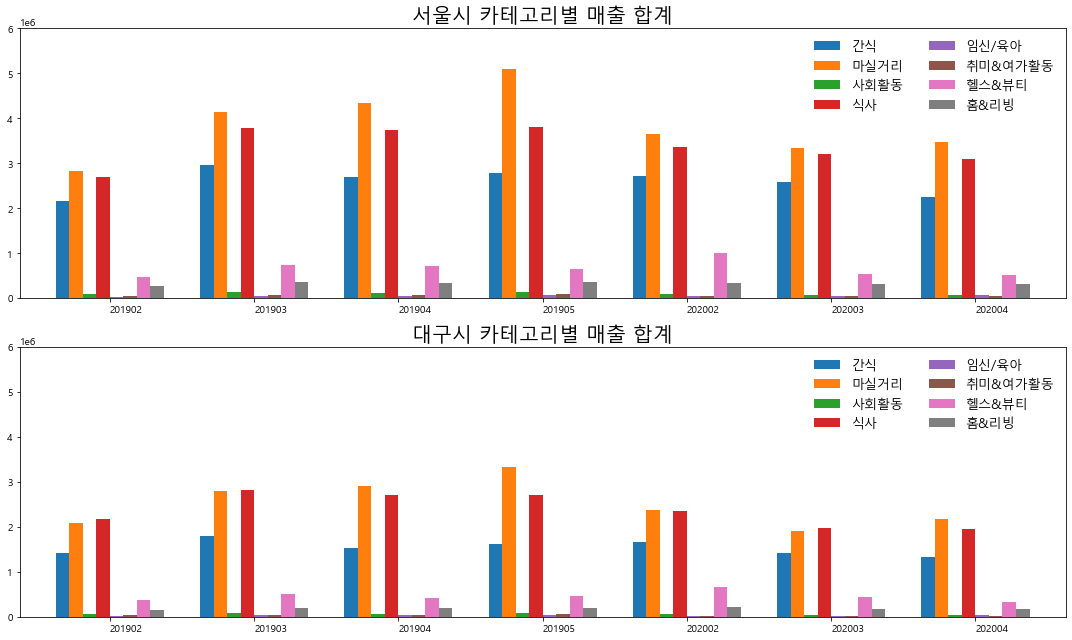

In [23]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,9)

cate_month_1.groupby(['PVN','ANTC_ITEM_LCLS_NM']).sum().T['서울특별시'].plot(kind='bar',width=0.75,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_title('서울시 카테고리별 매출 합계',size=20)
axes[0].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[0].set_ylim(0,6000000)

cate_month_1.groupby(['PVN','ANTC_ITEM_LCLS_NM']).sum().T['대구광역시'].plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='left')
axes[1].set_title('대구시 카테고리별 매출 합계',size=20)
axes[1].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[1].set_ylim(0,6000000)

plt.tight_layout()
plt.show()

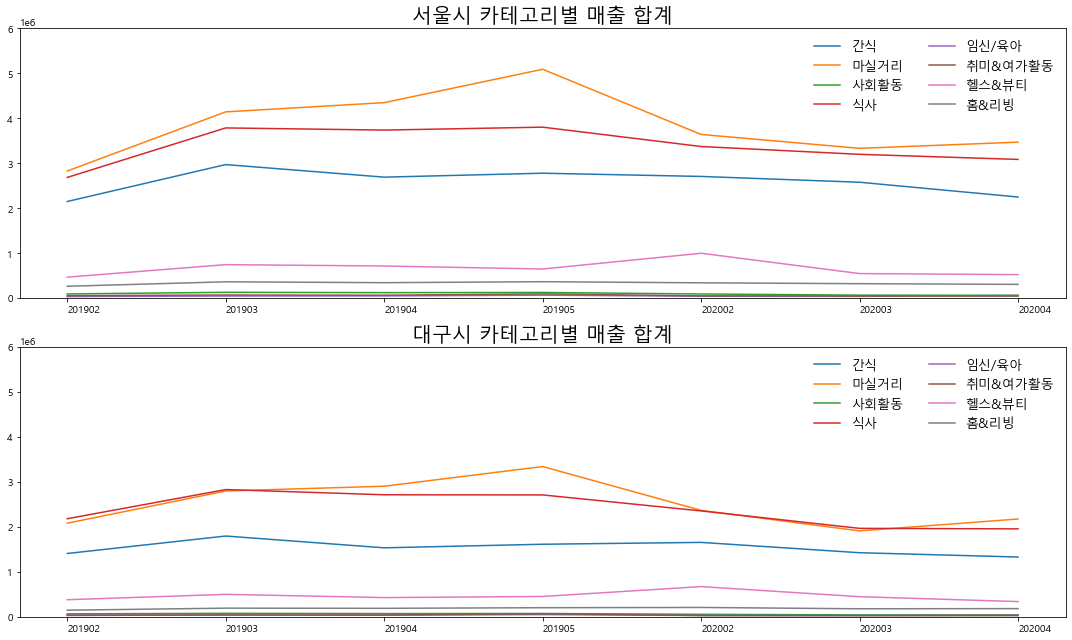

In [24]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,9)

cate_month_1.groupby(['PVN','ANTC_ITEM_LCLS_NM']).sum().T['서울특별시'].plot(kind='line',ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_title('서울시 카테고리별 매출 합계',size=20)
axes[0].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[0].set_ylim(0,6000000)

cate_month_1.groupby(['PVN','ANTC_ITEM_LCLS_NM']).sum().T['대구광역시'].plot(kind='line',ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='left')
axes[1].set_title('대구시 카테고리별 매출 합계',size=20)
axes[1].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[1].set_ylim(0,6000000)

plt.tight_layout()
plt.show()

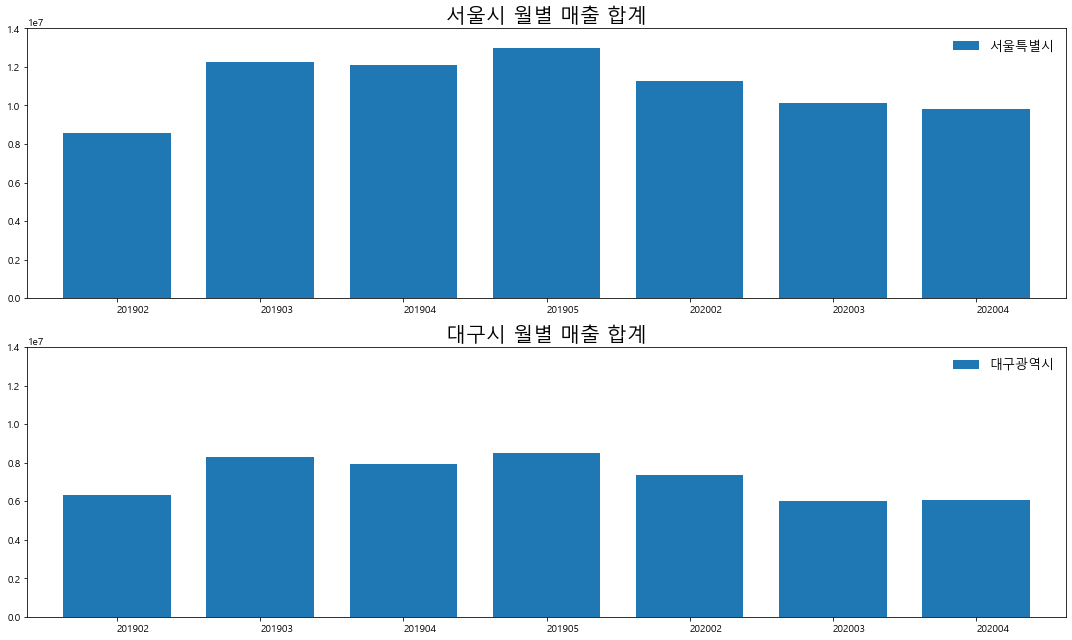

In [25]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,9)

cate_month_1.groupby('PVN').sum().T['서울특별시'].plot(kind='bar',width=0.75,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_title('서울시 월별 매출 합계',size=20)
axes[0].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[0].set_ylim(0,14000000)

cate_month_1.groupby('PVN').sum().T['대구광역시'].plot(kind='bar',width=0.75,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='left')
axes[1].set_title('대구시 월별 매출 합계',size=20)
axes[1].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[1].set_ylim(0,14000000)

plt.tight_layout()
plt.show()

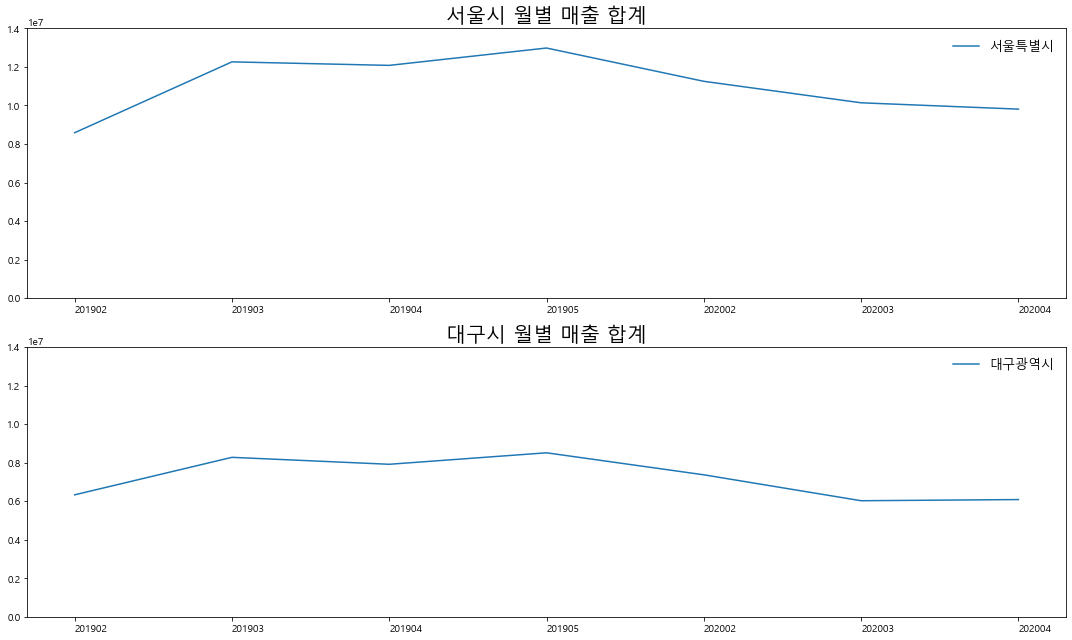

In [26]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,9)

cate_month_1.groupby('PVN').sum().T['서울특별시'].plot(kind='line',ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=0, ha='left')
axes[0].set_title('서울시 월별 매출 합계',size=20)
axes[0].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[0].set_ylim(0,14000000)

cate_month_1.groupby('PVN').sum().T['대구광역시'].plot(kind='line',ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=0, ha='left')
axes[1].set_title('대구시 월별 매출 합계',size=20)
axes[1].legend(loc='upper right', frameon=False,fontsize=13,ncol=2)
axes[1].set_ylim(0,14000000)

plt.tight_layout()
plt.show()